In [1]:
# % matplotlib inline
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
from skimage.viewer import ImageViewer
import skimage.color as color
import skimage.data as data
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc

<ipython-input-1-64d98b6416b8>:9: UserWarning: Viewer requires Qt
  from skimage.viewer import ImageViewer


In [2]:
im = Image.open("images/parrot.png")
print(im.width, im.height, im.mode, im.format, type(im))

453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>


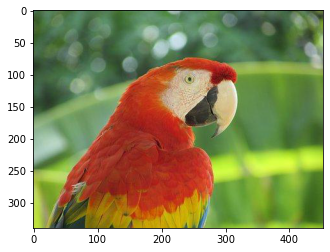

In [4]:
plt.imshow(im)

In [5]:
im_g = im.convert('L')

In [6]:
im_g.save('images/parrot_gray.png')

In [15]:
Image.open("images/parrot_gray.png").show()

In [16]:
im = mpimg.imread("images/hill.png")
print(im.shape, im.dtype, type(im))

(960, 1280, 4) float32 <class 'numpy.ndarray'>


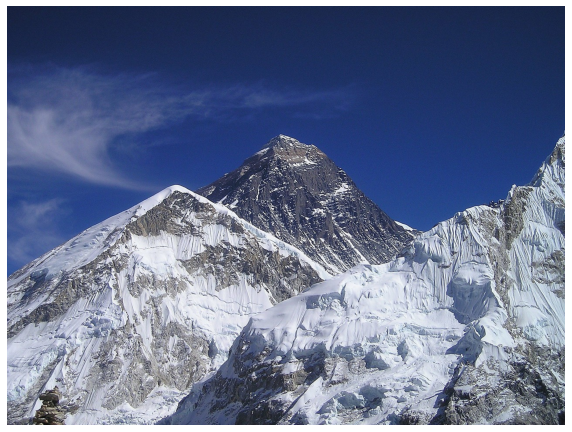

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.axis('off')
plt.show()

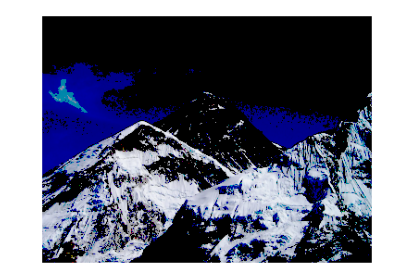

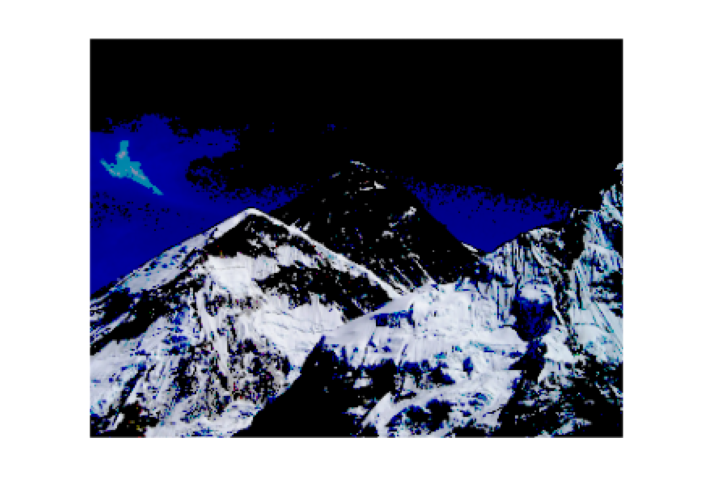

In [19]:
im1 = im
im[im1 < 0.5] = 0
plt.imshow(im1)
plt.axis('off')
plt.tight_layout()
plt.savefig("images/hill_dark.png")
im = mpimg.imread("images/hill_dark.png")
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.axis('off')
plt.tight_layout()
plt.show()

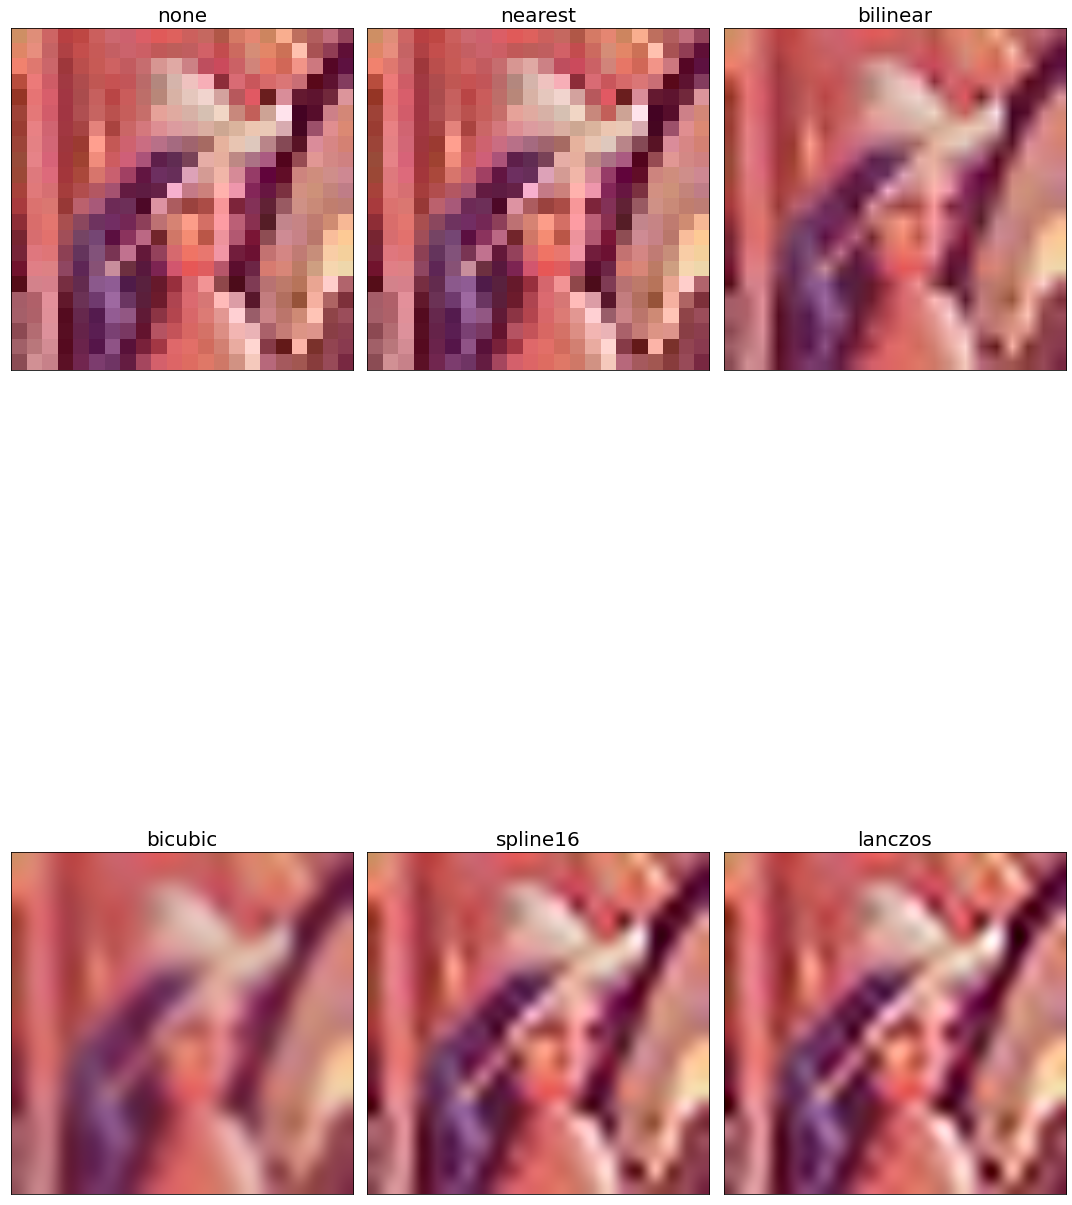

In [24]:
im = mpimg.imread("images/lena_small.jpg")
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 30), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method), size=20)
plt.tight_layout()
plt.show()

In [25]:
im = imread("images/parrot.png")
print(im.shape, im.dtype, type(im))

(340, 453, 3) uint8 <class 'numpy.ndarray'>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


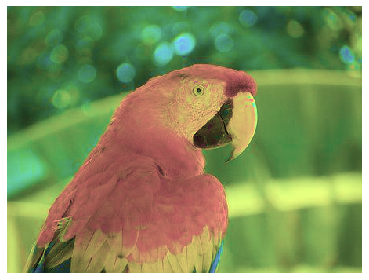

In [30]:
hsv = skimage.color.rgb2hsv(im)
hsv[:, :, 1] = 0.5
im1 = skimage.color.hsv2rgb(hsv)
imsave('images/parrot_hsv.png', im1)
im = imread("images/parrot_hsv.png")
plt.axis('off')
imshow(im)
show()

In [34]:
viewer = ImageViewer(im)
viewer.show()

# Qt is not work on my M1 Mac

<ipython-input-34-d967ad4ce7ca>:1: FutureWarning: `viewer` is deprecated and will be removed in 0.20. For alternatives, refer to https://scikit-image.org/docs/stable/user_guide/visualization.html
  viewer = ImageViewer(im)


AttributeError: 'QtGui_cls' object has no attribute 'QApplication'

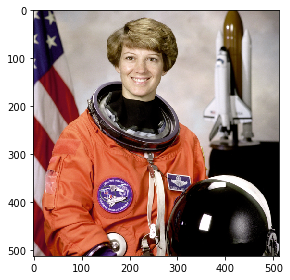

In [36]:
im = data.astronaut()
imshow(im)
show()

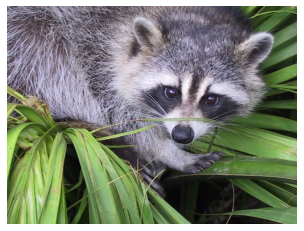

In [38]:
im = misc.face()
imsave('face.png', im)
plt.imshow(im)
plt.axis('off')
plt.show()

In [39]:
import imageio

<class 'imageio.core.util.Array'> (225, 225, 3) uint8


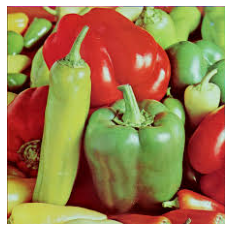

In [40]:
im = imageio.imread('images/pepper.jpg')
print(type(im), im.shape, im.dtype)
plt.imshow(im)
plt.axis('off')
plt.show()

In [2]:
im = Image.open("images/parrot.png")
print(im.mode)

RGB


In [3]:
im.save("images/parrot.jpg")

In [4]:
im = Image.open("images/hill.png")
print(im.mode)

RGBA


In [5]:
im.convert('RGB').save("images/hill.jpg")

In [6]:
im = imread("images/parrot.png", as_gray=True)
print(im.shape)

(340, 453)


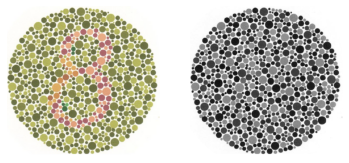

In [10]:
im = imread("images/Ishihara.png")
im_g = color.rgb2gray(im)
plt.subplot(121)
plt.imshow(im, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(im_g, cmap="gray")
plt.axis("off")
plt.show()

<Figure size 432x288 with 0 Axes>

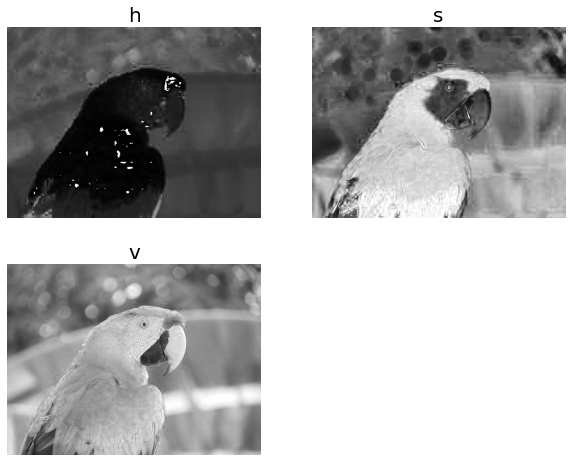

In [12]:
im = imread("images/parrot.png")
im_hsv = color.rgb2hsv(im)
plt.gray()
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.imshow(im_hsv[..., 0])
plt.title('h', size=20)
plt.axis('off')
plt.subplot(222)
plt.imshow(im_hsv[..., 1])
plt.title('s', size=20)
plt.axis('off')
plt.subplot(223)
plt.imshow(im_hsv[..., 2])
plt.title('v', size=20)
plt.axis('off')
plt.show()

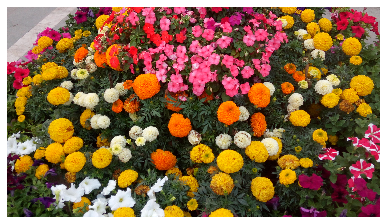

In [13]:
im = Image.open('images/flowers.png')
im = np.array(im)
imshow(im)
plt.axis('off')
show()

In [14]:
im = imread('images/flowers.png')
im = Image.fromarray(im)
im.show()

In [27]:
lena = mpimg.imread("images/lena.jpg")
lx, ly, _ = lena.shape

In [29]:
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X-lx/2)**2 + (Y-ly/2)**2 > lx*ly/4
print(mask)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [31]:
lena.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [33]:
lena = lena.copy()

In [34]:
lena[mask, :] = 0

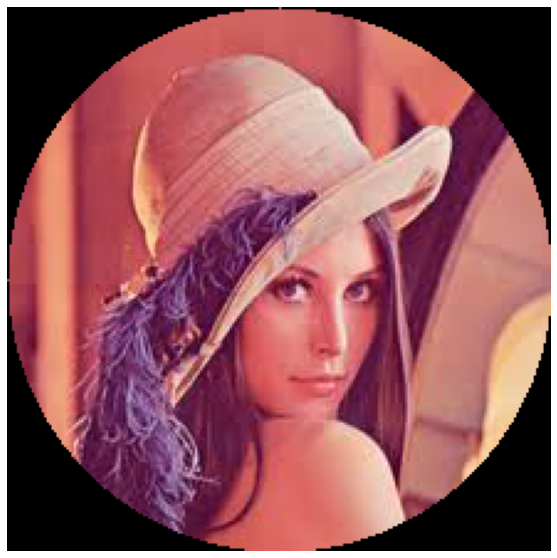

In [35]:
plt.figure(figsize=(10, 10))
plt.imshow(lena)
plt.axis('off')
plt.show()

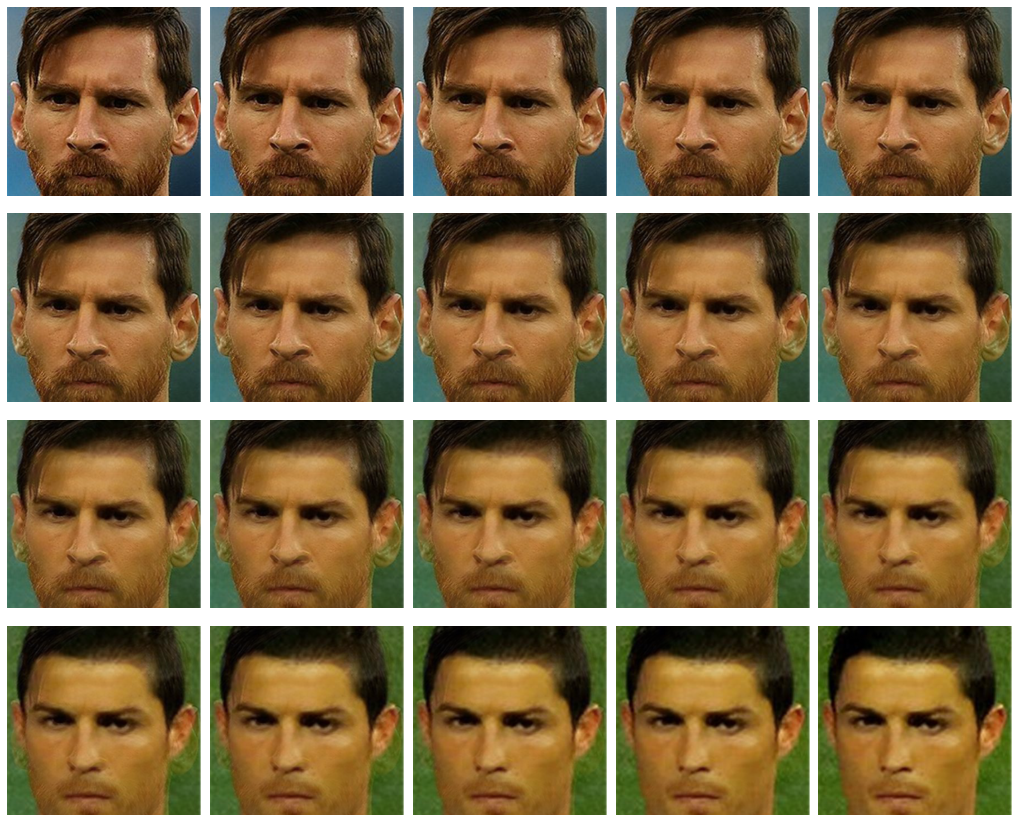

In [36]:
im1 = mpimg.imread("images/messi.jpg") / 255
im2 = mpimg.imread("images/ronaldo.jpg") / 255
i = 1
plt.figure(figsize=(18, 15))
for alpha in np.linspace(0, 1, 20):
    plt.subplot(4, 5, i)
    plt.imshow((1-alpha) * im1 + alpha * im2)
    plt.axis('off')
    i+=1
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [37]:
im = Image.open("images/parrot.png")
print(im.width, im.height, im.mode, im.format)

453 340 RGB PNG


In [38]:
im_c = im.crop((175, 75, 320, 200))
im_c.show()

In [39]:
im = Image.open("images/clock.jpg")
print(im.width, im.height)

107 105


In [40]:
im.show()

In [41]:
im_large = im.resize((im.width*5, im.height*5), Image.BILINEAR)
im_large.show()

In [43]:
im = Image.open("images/victoria_memorial.png")
print(im.width, im.height)

720 540


In [44]:
im.show()

In [48]:
im_small = im.resize((im.width//5, im.height//5), Image.ANTIALIAS)

In [49]:
im_small.show()

In [6]:
im = Image.open("images/parrot.png")
im_t = im.point(lambda x: 255 - x)
im_t.show()

In [3]:
im_g = im.convert('L')

In [52]:
im_g.show()

In [4]:
im_g.point(lambda x: 255*(x/255) ** 0.6).show()

In [5]:
im.transpose(Image.FLIP_LEFT_RIGHT).show()

In [7]:
im_45 = im.rotate(45)
im_45.show()